In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import ExponentialSmoothing as HWES
from scipy import stats
import statsmodels.api as sm

In [4]:
df = pd.read_csv("bmkg.csv", header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
df.index.freq = 'D'

C:\Users\TDMRC9\AppData\Local\Temp\ipykernel_25140\2582868736.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("bmkg.csv", header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])


In [5]:
df.head()

,Suhu,Kelembaban,Curah_Hujan
Tanggal,,,
2011-01-01,25.2,89.0,22.0
2011-01-02,26.5,85.0,5.0
2011-01-03,26.8,86.0,5.0
2011-01-04,25.9,89.0,16.0
2011-01-05,26.5,85.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5053 entries, 2011-01-01 to 2024-10-31
Freq: D
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suhu         4808 non-null   float64
 1   Kelembaban   4808 non-null   float64
 2   Curah_Hujan  3478 non-null   float64
dtypes: float64(3)
memory usage: 157.9 KB


In [7]:
df.describe()

,Suhu,Kelembaban,Curah_Hujan
count,4808.000000,4808.000000,3478.000000
mean,27.362230,78.897671,1092.303910
std,1.231762,7.405878,2905.192928
min,23.100000,46.000000,0.000000
25%,26.500000,75.000000,0.000000
50%,27.300000,80.000000,2.800000
75%,28.200000,84.000000,20.600000
max,33.000000,98.000000,8888.000000


In [8]:
# Menghitung berapa kali angka 2 muncul di kolom tertentu, misalnya kolom 'nilai'
jumlah_angka_dua = (df['Curah_Hujan'] == 8888).sum()

# Menampilkan hasil
print(f'Jumlah null : {jumlah_angka_dua}')

Jumlah null : 424


In [9]:
# Mengganti nilai spesifik dengan 0 di kolom tertentu
nilai_spesifik = 8888  # Nilai yang ingin diubah
cols_to_replace = ['Curah_Hujan', 'Kelembaban', 'Suhu']  # Kolom target

for col in cols_to_replace:
    df[col] = df[col].replace(nilai_spesifik, 0)  # Mengganti nilai spesifik dengan 0

print(df)

            Suhu  Kelembaban  Curah_Hujan
Tanggal                                  
2011-01-01  25.2        89.0         22.0
2011-01-02  26.5        85.0          5.0
2011-01-03  26.8        86.0          5.0
2011-01-04  25.9        89.0         16.0
2011-01-05  26.5        85.0          0.0
...          ...         ...          ...
2024-10-27  27.5        75.0          0.0
2024-10-28  28.8        75.0          4.5
2024-10-29  28.3        75.0          0.0
2024-10-30  27.3        76.0          0.0
2024-10-31  27.7        74.0          0.0

[5053 rows x 3 columns]


In [10]:
df.describe()
#BMKG Sebelum Imputasi

,Suhu,Kelembaban,Curah_Hujan
count,4808.000000,4808.000000,3478.000000
mean,27.362230,78.897671,8.775446
std,1.231762,7.405878,19.213520
min,23.100000,46.000000,0.000000
25%,26.500000,75.000000,0.000000
50%,27.300000,80.000000,0.800000
75%,28.200000,84.000000,8.000000
max,33.000000,98.000000,200.000000


In [11]:
# Melihat jumlah nilai null di setiap kolom
null_counts = df.isnull().sum()
print(null_counts)

Suhu            245
Kelembaban      245
Curah_Hujan    1575
dtype: int64


In [12]:
# Mengisi data kosong dengan mean dari masing-masing kolom
cols_to_fill = ['Curah_Hujan', 'Kelembaban', 'Suhu']  # Kolom target

for col in cols_to_fill:
    mean_value = df[col].mean()  # Menghitung mean dari kolom
    df[col] = df[col].fillna(mean_value)  # Mengisi nilai kosong dengan mean

print(df)

            Suhu  Kelembaban  Curah_Hujan
Tanggal                                  
2011-01-01  25.2        89.0         22.0
2011-01-02  26.5        85.0          5.0
2011-01-03  26.8        86.0          5.0
2011-01-04  25.9        89.0         16.0
2011-01-05  26.5        85.0          0.0
...          ...         ...          ...
2024-10-27  27.5        75.0          0.0
2024-10-28  28.8        75.0          4.5
2024-10-29  28.3        75.0          0.0
2024-10-30  27.3        76.0          0.0
2024-10-31  27.7        74.0          0.0

[5053 rows x 3 columns]


In [13]:
df.describe()
#BMKG Setelah Imputasi

,Suhu,Kelembaban,Curah_Hujan
count,5053.000000,5053.000000,5053.000000
mean,27.362230,78.897671,8.775446
std,1.201523,7.224070,15.939607
min,23.100000,46.000000,0.000000
25%,26.600000,75.000000,0.000000
50%,27.362230,79.000000,6.500000
75%,28.100000,84.000000,8.775446
max,33.000000,98.000000,200.000000


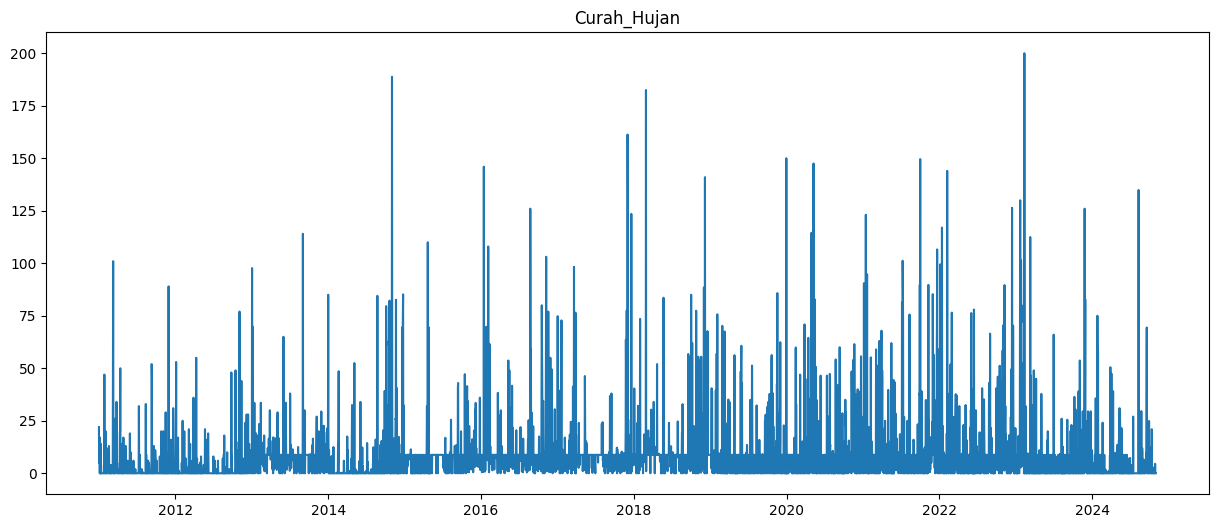

In [14]:
plt.figure(figsize=(15, 6), dpi=100)
plt.title('Curah_Hujan')
plt.plot(df['Curah_Hujan'])

In [15]:
data = df.drop(columns=['Kelembaban', 'Suhu'])

In [16]:
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = df['Curah_Hujan'].quantile(0.25)
Q3 = df['Curah_Hujan'].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi data outlier
outliers = df[(df['Curah_Hujan'] < lower_bound) | (df['Curah_Hujan'] > upper_bound)]

# Menampilkan jumlah data outlier
print(f"Jumlah data outlier: {outliers.shape[0]}")

# Menampilkan data outlier
print(outliers)
print("Nilai outliers:", min(outliers['Curah_Hujan']))

Jumlah data outlier: 427
            Suhu  Kelembaban  Curah_Hujan
Tanggal                                  
2011-01-01  25.2        89.0         22.0
2011-01-27  25.4        90.0         47.0
2011-03-09  25.1        89.0         45.0
2011-03-10  25.9        86.0        101.0
2011-03-17  25.6        88.0         26.0
...          ...         ...          ...
2024-08-10  26.7        85.0        134.9
2024-08-23  27.2        81.0         29.6
2024-09-17  24.4        92.0         37.5
2024-09-18  28.7        67.0         69.4
2024-09-29  26.5        88.0         24.9

[427 rows x 3 columns]
Nilai outliers: 22.0


In [17]:
Q1 = df['Curah_Hujan'].quantile(0.25)
Q3 = df['Curah_Hujan'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df['Curah_Hujan'] < (Q1 - 1.5 * IQR)) | (df['Curah_Hujan'] > (Q3 + 1.5 * IQR))
df.loc[outlier_mask, 'Curah_Hujan'] = df['Curah_Hujan'].median()  # atau interpolasi

In [39]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Curah_Hujan_Transformed'] = scaler.fit_transform(df[['Curah_Hujan']]) # Penambahan offset, sesuaikan nilai

ImportError: No module named 'sklearn.__check_build._check_build'
___________________________________________________________________________
Contents of c:\Users\TDMRC9\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\__check_build:
meson.build               _check_build.cp313-win_amd64.lib_check_build.cp313-win_amd64.pyd
_check_build.pyx          __init__.py               __pycache__
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it. For detailed instructions, see:
https://scikit-learn.org/dev/developers/advanced_installation.html#building-from-source

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.

In [ ]:
df['Curah_Hujan_Transformed'] = df['Curah_Hujan'].rolling(window=7, center=True).mean()
df['Curah_Hujan_Transformed'] = df['Curah_Hujan_Transformed'].fillna(method='bfill').fillna(method='ffill')
# Cek hasil smoothing
print(df['Curah_Hujan_Transformed'])

Tanggal
2011-01-01    7.071429
2011-01-02    7.071429
2011-01-03    7.071429
2011-01-04    7.071429
2011-01-05    6.428571
                ...   
2024-10-27    0.642857
2024-10-28    0.642857
2024-10-29    0.642857
2024-10-30    0.642857
2024-10-31    0.642857
Freq: D, Name: Curah_Hujan_Transformed, Length: 5053, dtype: float64


C:\Users\TDMRC9\AppData\Local\Temp\ipykernel_20536\3364685326.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Curah_Hujan_Transformed'] = df['Curah_Hujan_Transformed'].fillna(method='bfill').fillna(method='ffill')


In [ ]:
# Winsorizing (membatasi nilai dalam rentang persentil tertentu)
lower_percentile = df['Curah_Hujan'].quantile(0.05)
upper_percentile = df['Curah_Hujan'].quantile(0.95)
df['Curah_Hujan_Transformed'] = df['Curah_Hujan'].clip(lower=lower_percentile, upper=upper_percentile)

In [ ]:
# Hitung rata-rata dari kolom 'curah_hujan'
mean_value = df['Curah_Hujan'].mean()

# Ganti nilai yang lebih besar dari 50 dengan rata-rata
df.loc[df['Curah_Hujan'] > 19.3, 'Curah_Hujan'] = mean_value

# Tampilkan hasil
print(df)

            Suhu  Kelembaban  Curah_Hujan  Curah_Hujan_Transformed
Tanggal                                                           
2011-01-01  25.2        89.0          6.5                      6.5
2011-01-02  26.5        85.0          5.0                      5.0
2011-01-03  26.8        86.0          5.0                      5.0
2011-01-04  25.9        89.0         16.0                     12.5
2011-01-05  26.5        85.0          0.0                      0.0
...          ...         ...          ...                      ...
2024-10-27  27.5        75.0          0.0                      0.0
2024-10-28  28.8        75.0          4.5                      4.5
2024-10-29  28.3        75.0          0.0                      0.0
2024-10-30  27.3        76.0          0.0                      0.0
2024-10-31  27.7        74.0          0.0                      0.0

[5053 rows x 4 columns]


In [ ]:
df['Curah_Hujan_Transformed'] = np.log(df['Curah_Hujan']+100)

In [ ]:
df

,Suhu,Kelembaban,Curah_Hujan,Curah_Hujan_Transformed
Tanggal,,,,
2011-01-01,25.2,89.0,6.5,4.668145
2011-01-02,26.5,85.0,5.0,4.653960
2011-01-03,26.8,86.0,5.0,4.653960
2011-01-04,25.9,89.0,16.0,4.753590
2011-01-05,26.5,85.0,0.0,4.605170
...,...,...,...,...
2024-10-27,27.5,75.0,0.0,4.605170
2024-10-28,28.8,75.0,4.5,4.649187
2024-10-29,28.3,75.0,0.0,4.605170


In [ ]:
import pandas as pd

# Misalkan df adalah DataFrame yang berisi data curah hujan
df['Curah_Hujan_Transformed'] = (df['Curah_Hujan'] - df['Curah_Hujan'].min()) / (df['Curah_Hujan'].max() - df['Curah_Hujan'].min())

In [ ]:
# Transformasi logaritmik
df['Curah_Hujan_Transformed'] = np.log(df['Curah_Hujan'] + 10)

In [ ]:
# Transformasi logaritmik
df['Curah_Hujan_Transformed'] = np.log1p(df['Curah_Hujan'] + 10)

In [ ]:
from scipy.stats.mstats import winsorize
df['Curah_Hujan_Transformed'] = winsorize(df['Curah_Hujan'], limits=[0.05, 0.05])

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['Curah_Hujan_Transformed'] = pt.fit_transform(df[['Curah_Hujan']])

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df['Curah_Hujan_Transformed'] = scaler.fit_transform(df[['Curah_Hujan']])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Curah_Hujan_Transformed'] = scaler.fit_transform(df[['Curah_Hujan']])

In [ ]:
from scipy import stats
df['Curah_Hujan_Transformed'] = np.sqrt(df['Curah_Hujan'])

In [ ]:
df

,Suhu,Kelembaban,Curah_Hujan,Curah_Hujan_Transformed
Tanggal,,,,
2011-01-01,25.2,89.0,6.5,2.549510
2011-01-02,26.5,85.0,5.0,2.236068
2011-01-03,26.8,86.0,5.0,2.236068
2011-01-04,25.9,89.0,11.0,3.316625
2011-01-05,26.5,85.0,0.0,0.000000
...,...,...,...,...
2024-10-27,27.5,75.0,0.0,0.000000
2024-10-28,28.8,75.0,4.5,2.121320
2024-10-29,28.3,75.0,0.0,0.000000


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def find_best_c(data, c_values, seasonal_periods):
    tscv = TimeSeriesSplit(n_splits=5)
    best_c = None
    best_rmse = float('inf')

    for c in c_values:
        transformed_data = np.log1p(data + c)
        rmses = []

        for train_idx, test_idx in tscv.split(transformed_data):
            train, test = transformed_data[train_idx], transformed_data[test_idx]

            # Buat model Holt-Winters untuk data training
            model = ExponentialSmoothing(
                train,
                seasonal='additive',  # Atau 'multiplicative' jika cocok
                seasonal_periods=seasonal_periods,
                trend='additive'
            ).fit()

            # Prediksi pada data test
            preds = model.forecast(len(test))
            rmses.append(mean_squared_error(test, preds))

        # Evaluasi rata-rata RMSE untuk nilai C ini
        avg_rmse = np.mean(rmses)
        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_c = c

    return best_c, best_rmse

# Contoh pemanggilan
c_values = np.linspace(0.1, 10, 50)  # Rentang nilai C
seasonal_periods = 365  # Sesuaikan dengan pola musiman data
best_c, best_rmse = find_best_c(data['Curah_Hujan'].values, c_values, seasonal_periods)
print(f"Optimal C: {best_c}, RMSE: {best_rmse}")

Optimal C: 10.0, RMSE: 0.29947450559033595


In [ ]:
def find_best_c(data, c_values, seasonal_periods):
    tscv = TimeSeriesSplit(n_splits=5)
    best_c = None
    best_rmse = float('inf')

    for c in c_values:
        transformed_data = np.log(data + c)
        rmses = []

        for train_idx, test_idx in tscv.split(transformed_data):
            train, test = transformed_data[train_idx], transformed_data[test_idx]

            # Buat model Holt-Winters untuk data training
            model = ExponentialSmoothing(
                train,
                seasonal='additive',  # Atau 'multiplicative' jika cocok
                seasonal_periods=seasonal_periods,
                trend='additive'
            ).fit()

            # Prediksi pada data test
            preds = model.forecast(len(test))
            rmses.append(mean_squared_error(test, preds))

        # Evaluasi rata-rata RMSE untuk nilai C ini
        avg_rmse = np.mean(rmses)
        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_c = c

    return best_c, best_rmse

# Contoh pemanggilan
c_values = np.linspace(0.1, 10, 50)  # Rentang nilai C
seasonal_periods = 365  # Sesuaikan dengan pola musiman data
best_c, best_rmse = find_best_c(data['Curah_Hujan'].values, c_values, seasonal_periods)
print(f"Optimal C: {best_c}, RMSE: {best_rmse}")

Optimal C: 10.0, RMSE: 0.33093256560153456


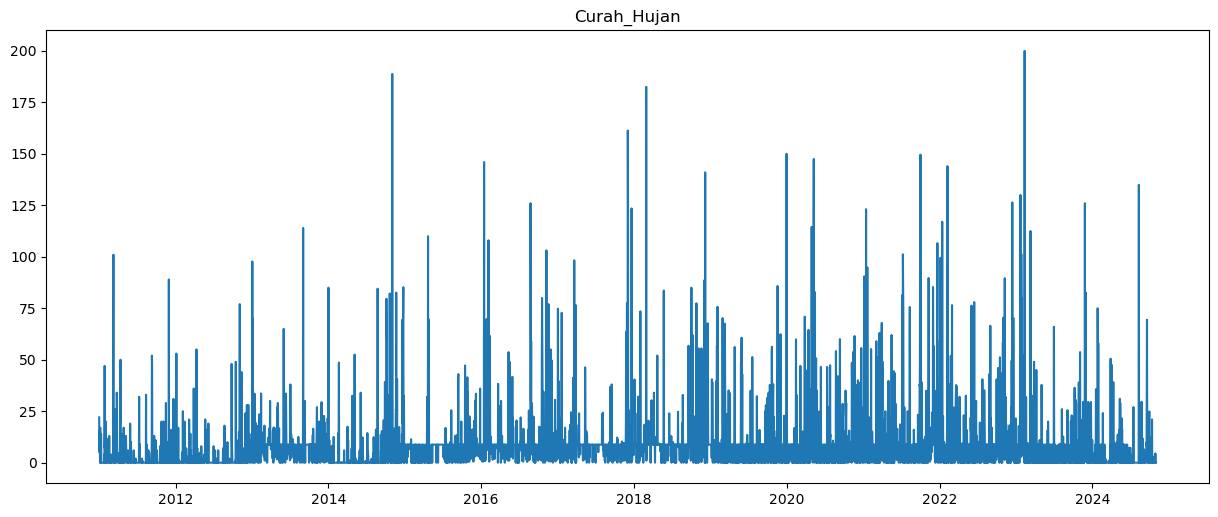

In [ ]:
plt.figure(figsize=(15, 6), dpi=100)
plt.title('Curah_Hujan')
plt.plot(df['Curah_Hujan'])

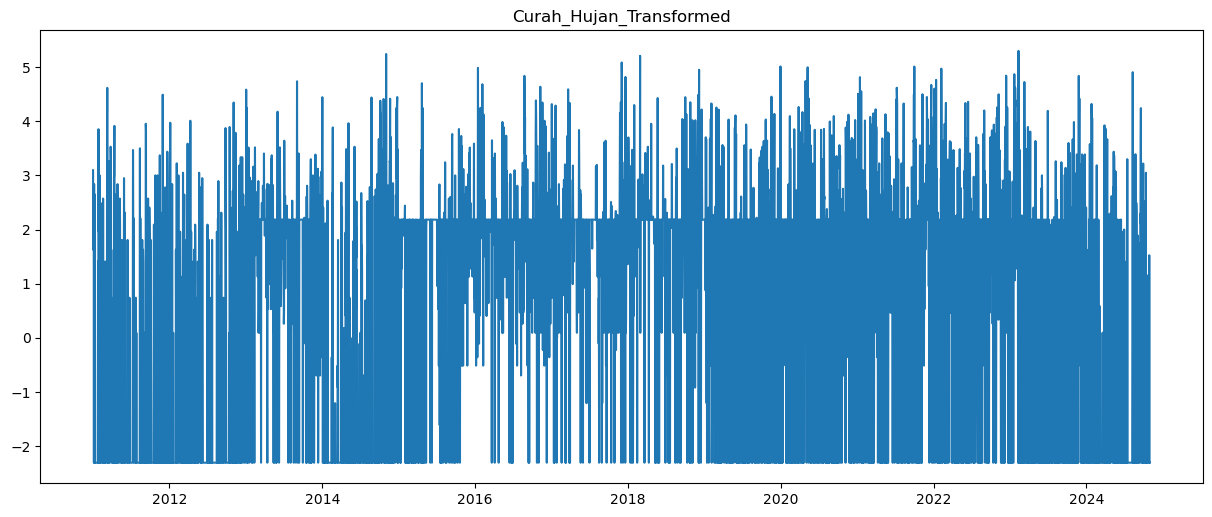

In [ ]:
plt.figure(figsize=(15, 6), dpi=100)
plt.title('Curah_Hujan_Transformed')
plt.plot(df['Curah_Hujan_Transformed'])

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

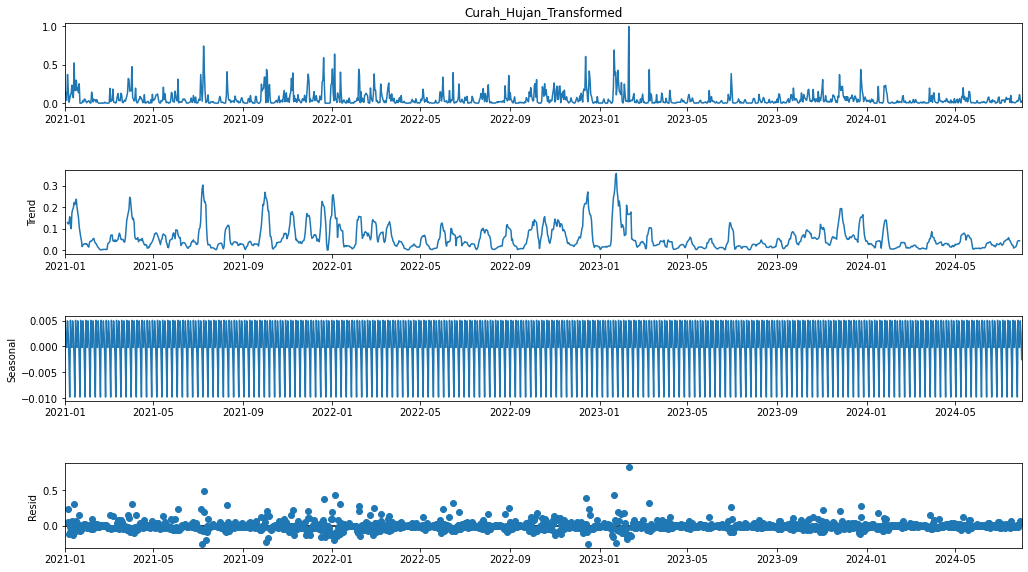

In [ ]:
ch_decompose = seasonal_decompose(df['Curah_Hujan_Transformed'], model = "additive")
fig = ch_decompose.plot()
fig.set_size_inches(16,9)
plt.show()

In [ ]:
# Tentukan proporsi pembagian
train_size = int(len(df) * 0.9)

# Membagi data
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [ ]:
train.tail()

,Suhu,Kelembaban,Curah_Hujan
Tanggal,,,
2023-06-09,29.1,67.0,0.000000
2023-06-10,28.7,70.0,0.000000
2023-06-11,30.0,61.0,0.000000
2023-06-12,29.4,61.0,0.000000
2023-06-13,29.9,56.0,8.775446


In [ ]:
test

,Suhu,Kelembaban,Curah_Hujan
Tanggal,,,
2023-06-14,29.6,66.0,8.775446
2023-06-15,28.4,66.0,0.000000
2023-06-16,28.2,69.0,0.000000
2023-06-17,29.6,54.0,6.500000
2023-06-18,29.7,55.0,0.000000
...,...,...,...
2024-10-27,27.5,75.0,0.000000
2024-10-28,28.8,75.0,4.500000
2024-10-29,28.3,75.0,0.000000


In [ ]:
hwmodel=ExponentialSmoothing(train.Curah_Hujan,trend='add', seasonal='add', 
                             seasonal_periods=365, damped_trend=True).fit(optimized=True)
print(hwmodel.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:              Curah_Hujan   No. Observations:                 4547
Model:             ExponentialSmoothing   SSE                        1131951.406
Optimized:                         True   AIC                          25826.848
Trend:                         Additive   BIC                          28203.070
Seasonal:                      Additive   AICC                         25893.334
Seasonal Periods:                   365   Date:                 Sun, 22 Dec 2024
Box-Cox:                          False   Time:                         13:36:33
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.0557349                alpha                 True
smoothing_trend       

In [ ]:
test_pred=hwmodel.forecast(506)
# Menampilkan baris dengan nilai di bawah 0
nilai_negatif = np.sum(test_pred < 0)

print(nilai_negatif)

52


In [ ]:
# Menggunakan clamping untuk mengganti nilai negatif menjadi nol
test_pred = np.clip(test_pred, 0, None)

<AxesSubplot:title={'center':'Curah_Hujan Spliting 90 : 10'}, xlabel='Tanggal'>

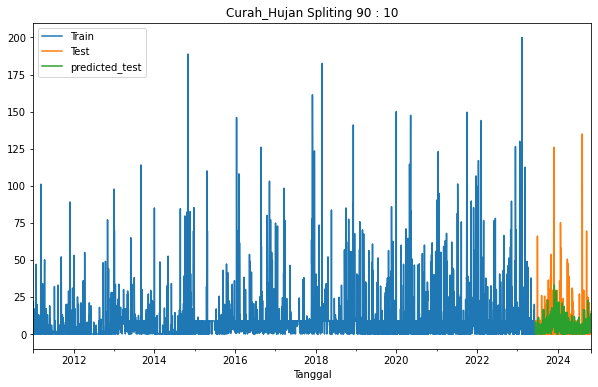

In [ ]:
train['Curah_Hujan'].plot(legend=True, label='Train', figsize=(10,6))
test['Curah_Hujan'].plot(legend=True, label='Test')
plt.title('Curah_Hujan Spliting 90 : 10')

test_pred.plot(legend=True, label='predicted_test')

In [ ]:
#Spliting data 90:10
from sklearn.metrics import mean_absolute_percentage_error, 
mean_squared_error
# Calculate errors
errors = abs(test['Curah_Hujan'] - test_pred)
mae = np.mean(np.abs(errors))
mse = mean_squared_error(test['Curah_Hujan'], test_pred)
rmse = np.sqrt(mse)

# Print results
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 7.38
MSE: 194.59
RMSE: 13.95


In [ ]:
# Buat model Holt-Winters dengan parameter manual
hw_model = ExponentialSmoothing(
    df['Curah_Hujan'], 
    trend="add",            # Trend aditif
    seasonal="add",         # Seasonal aditif
    seasonal_periods=365     # Jumlah periode musiman (contoh: data bulanan)
)

# Fit model dengan parameter manual
fitted_model = hw_model.fit(
    smoothing_level=0.0557349,  # alpha
    smoothing_slope=0.0004323,  # beta
    smoothing_seasonal=0.083,  # gamma
    optimized=False  # Jangan optimalkan, gunakan parameter manual
)

C:\Users\USER\AppData\Local\Temp\ipykernel_2552\3489229241.py:10: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = hw_model.fit(


In [ ]:
# Hasil
print(fitted_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:              Curah_Hujan   No. Observations:                 5053
Model:             ExponentialSmoothing   SSE                        1287695.417
Optimized:                        False   AIC                          28734.790
Trend:                         Additive   BIC                          31143.525
Seasonal:                      Additive   AICC                         28793.757
Seasonal Periods:                   365   Date:                 Sun, 22 Dec 2024
Box-Cox:                          False   Time:                         14:02:36
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.0557349                alpha                False
smoothing_trend       

In [ ]:
# Prediksi ke depan
pred = fitted_model.forecast(steps=365)
print(pred)

2024-11-01     0.813962
2024-11-02     0.279828
2024-11-03     6.791103
2024-11-04     2.219287
2024-11-05    -0.043889
                ...    
2025-10-27     1.593671
2025-10-28    -2.158223
2025-10-29     2.232337
2025-10-30    14.828516
2025-10-31    12.246167
Freq: D, Length: 365, dtype: float64


In [ ]:
nilai_negatif = np.sum(pred < 0)
print(nilai_negatif)

254


In [ ]:
# Menggunakan clamping untuk mengganti nilai negatif menjadi nol
pred = np.clip(pred, 0, None)

In [ ]:
# Simpan hasil prediksi ke dalam DataFrame (jika belum dalam DataFrame)
pred_df = pd.DataFrame({'Date': pred.index, 'Curah Hujan': pred.values})

# Simpan ke file CSV
pred_df.to_csv('D:/cool/TA/data/HW curah hujan BMKG.csv', index=False)

In [ ]:
historical_data = df['Curah_Hujan']

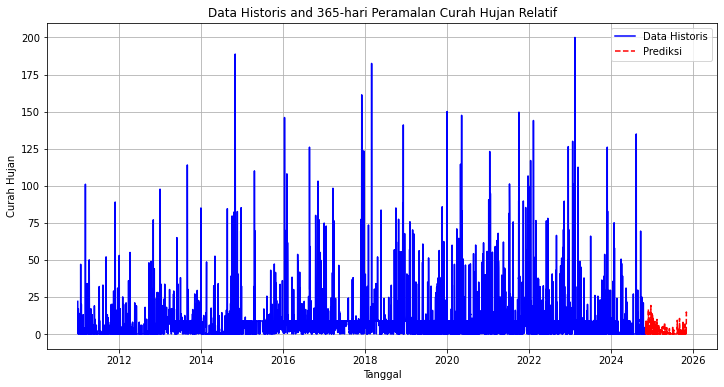

In [ ]:
# Visualisasi
plt.figure(figsize=(12, 6))

# Plot data historis
plt.plot(historical_data.index, historical_data, label='Data Historis', color='blue')

# Plot prediksi
plt.plot(pred.index, pred.values, label='Prediksi', color='Red', linestyle='--')

# Tambahkan label dan judul
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan')
plt.title('Data Historis and 365-hari Peramalan Curah Hujan Relatif')
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

In [ ]:
hwmodel=ExponentialSmoothing(train.Curah_Hujan_Transformed,trend='add', seasonal='add', seasonal_periods=365, damped_trend=True).fit(optimized=True)
print(hwmodel.summary())

                         ExponentialSmoothing Model Results                        
Dep. Variable:     Curah_Hujan_Transformed   No. Observations:                 3537
Model:                ExponentialSmoothing   SSE                            604.619
Optimized:                            True   AIC                          -5507.880
Trend:                            Additive   BIC                          -3224.597
Seasonal:                         Additive   AICC                         -5420.171
Seasonal Periods:                      365   Date:                 Tue, 10 Dec 2024
Box-Cox:                             False   Time:                         09:48:43
Box-Cox Coeff.:                       None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.0350884                alpha                 

In [ ]:
test_pred=hwmodel.forecast(1516)

In [ ]:
test_pred

2020-09-07    2.817140
2020-09-08    3.182573
2020-09-09    2.730294
2020-09-10    2.723238
2020-09-11    2.949447
                ...   
2024-10-27    2.916400
2024-10-28    2.978003
2024-10-29    2.837906
2024-10-30    3.025466
2024-10-31    3.159433
Freq: D, Length: 1516, dtype: float64

In [ ]:
# Menampilkan baris dengan nilai di bawah 0
nilai_negatif = np.sum(test_pred < 0)

print(nilai_negatif)

0


In [ ]:
# Menggunakan clamping untuk mengganti nilai negatif menjadi nol
test_pred = np.clip(test_pred, 0, None)

<AxesSubplot:title={'center':'Curah_Hujan Spliting 80 : 20'}, xlabel='Tanggal'>

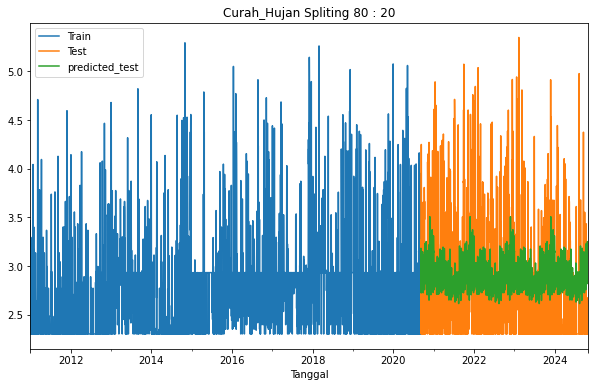

In [ ]:
train['Curah_Hujan_Transformed'].plot(legend=True, label='Train', figsize=(10,6))
test['Curah_Hujan_Transformed'].plot(legend=True, label='Test')
plt.title('Curah_Hujan Spliting 80 : 20')
test_pred.plot(legend=True, label='predicted_test')

In [ ]:
#Spliting data 70:30
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
# Calculate errors
errors = abs(test['Curah_Hujan_Transformed'] - test_pred)
mae = np.mean(np.abs(errors))
mse = mean_squared_error(test['Curah_Hujan_Transformed'], test_pred)
rmse = np.sqrt(mse)

# Print results
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 0.47
MSE: 0.35
RMSE: 0.59


In [ ]:
import numpy as np
import pandas as pd

# Asumsi test_pred sudah dalam bentuk DataFrame atau Series
# Jika test_pred adalah Series, konversi ke DataFrame terlebih dahulu
test_pred_df = test_pred.to_frame(name="Prediksi")

# Inverse scaling pada kolom "Prediksi"
test_pred_df[["pred_asli"]] = scaler.inverse_transform(test_pred_df[["Prediksi"]])

# Cetak hasil forecast dengan tanggal
print(test_pred_df[["pred_asli"]])

             pred_asli
2020-09-07  563.428098
2020-09-08  636.514589
2020-09-09  546.058825
2020-09-10  544.647691
2020-09-11  589.889324
...                ...
2024-10-27  583.280041
2024-10-28  595.600668
2024-10-29  567.581292
2024-10-30  605.093287
2024-10-31  631.886570

[1516 rows x 1 columns]


In [ ]:
pred_asli

array([[26.27335909],
       [14.73970874],
       [ 4.37612215],
       [16.75274719],
       [49.78928684],
       [28.95576421],
       [17.66733739],
       [ 7.04394455],
       [ 5.0903889 ],
       [ 5.32162507],
       [ 9.63293185],
       [ 2.88949088],
       [ 2.85108505],
       [ 2.78754509],
       [ 3.80393713],
       [ 4.02530252],
       [ 6.22662396],
       [ 8.06305278],
       [10.93464741],
       [ 9.39104034],
       [ 5.82741431],
       [14.51374063],
       [ 8.50993274],
       [ 3.90134603],
       [10.5179801 ],
       [ 8.95457557],
       [ 9.19596382],
       [13.66239041],
       [18.13869945],
       [ 7.91014036],
       [ 3.87660119],
       [ 3.34297512],
       [ 3.79933033],
       [ 2.79563115],
       [ 2.78708432],
       [ 8.66344375],
       [28.1998501 ],
       [13.02128143],
       [ 5.90277978],
       [ 5.46920048],
       [ 6.34546878],
       [ 3.66169903],
       [ 5.68807235],
       [ 4.72947097],
       [ 5.28076192],
       [ 6

In [ ]:
# Tentukan tanggal awal dan buat rentang tanggal
start_date = '2023-07-05'  # Sesuaikan tanggal mulai sesuai kebutuhan
date_range = pd.date_range(start=start_date, periods=len(pred_asli), freq='D')

# Konversi array menjadi Series dengan tanggal sebagai indeks
pred_asli_series = pd.Series(pred_asli.flatten(), index=date_range, name='pred_asli')

# Tampilkan hasil Series
print(pred_asli_series)

2023-07-05    26.273359
2023-07-06    14.739709
2023-07-07     4.376122
2023-07-08    16.752747
2023-07-09    49.789287
                ...    
2024-07-27     3.901346
2024-07-28    10.517980
2024-07-29     8.954576
2024-07-30     9.195964
2024-07-31    13.662390
Freq: D, Name: pred_asli, Length: 393, dtype: float64


In [ ]:
# Anti-transformasi Log
pred_asli = np.exp(test_pred) - 10
pred_asli

2023-06-14    1.202490
2023-06-15    2.746022
2023-06-16    0.950374
2023-06-17    3.405983
2023-06-18    2.573636
                ...   
2024-10-27    4.203245
2024-10-28    3.320133
2024-10-29    4.949677
2024-10-30    4.725330
2024-10-31    8.196681
Freq: D, Length: 506, dtype: float64

In [ ]:
# Transformasi logaritmik
df['Curah_Hujan_Transformed'] = np.log(df['Curah_Hujan'] + 1)
# Tentukan proporsi pembagian
train_size = int(len(df) * 0.7)

# Membagi data
train = df.iloc[:train_size]
test = df.iloc[train_size:]

hwmodel=ExponentialSmoothing(train.Curah_Hujan_Transformed,trend='add', seasonal='add', seasonal_periods=365, damped_trend=True).fit(optimized=True)

test_pred=hwmodel.forecast(1516)

#Spliting data 70:30
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
# Calculate errors
errors = abs(test['Curah_Hujan_Transformed'] - test_pred)
mae = np.mean(np.abs(errors))
mse = mean_squared_error(test['Curah_Hujan_Transformed'], test_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs(errors / test['Curah_Hujan_Transformed'])) * 100
MAPE = mean_absolute_percentage_error(test['Curah_Hujan_Transformed'], test_pred)

# Print results
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print("(MAPE):", MAPE)

MAE: 1.24
MSE: 2.12
RMSE: 1.46
MAPE: inf%
(MAPE): 3188828385741320.0


In [ ]:
# Anti-transformasi Log
pred_asli = np.expm1(test_pred) - 10
pred_asli

2023-06-14    1.216781
2023-06-15    2.849416
2023-06-16    0.963345
2023-06-17    3.480262
2023-06-18    2.608959
                ...   
2024-10-27    4.313979
2024-10-28    3.380028
2024-10-29    5.108220
2024-10-30    4.911235
2024-10-31    8.436160
Freq: D, Length: 506, dtype: float64

In [ ]:
# Anti-transformasi Log
pred_asli = test_pred**2
pred_asli

2023-07-05     8.239604
2023-07-06     3.164824
2023-07-07     0.058130
2023-07-08     5.223277
2023-07-09    20.449370
                ...    
2024-07-27     0.031830
2024-07-28     2.010722
2024-07-29     2.994543
2024-07-30     2.656051
2024-07-31     6.431301
Freq: D, Length: 393, dtype: float64

In [ ]:
pred_asli = test_pred * (df['Curah_Hujan'].max() - df['Curah_Hujan'].min()) + df['Curah_Hujan'].min()
pred_asli

2023-07-05    26.252818
2023-07-06    14.723263
2023-07-07     4.353106
2023-07-08    16.720907
2023-07-09    49.761170
                ...    
2024-07-27     3.811984
2024-07-28    10.425815
2024-07-29     8.857970
2024-07-30     9.091755
2024-07-31    13.553410
Freq: D, Length: 393, dtype: float64

In [ ]:
test['Curah_Hujan']

Tanggal
2023-07-05     0.13
2023-07-06     0.16
2023-07-07     0.75
2023-07-08     1.45
2023-07-09     2.64
              ...  
2024-07-27     7.33
2024-07-28    13.82
2024-07-29     5.29
2024-07-30     1.23
2024-07-31     3.19
Freq: D, Name: Curah_Hujan, Length: 393, dtype: float64

In [ ]:
# Menampilkan baris dengan nilai di bawah 0
nilai_negatif = np.sum(pred_asli < 0)

print(nilai_negatif)

3


In [ ]:
# Menggunakan clamping untuk mengganti nilai negatif menjadi nol
pred_asli = np.clip(pred_asli, 0, None)

<AxesSubplot:xlabel='Tanggal'>

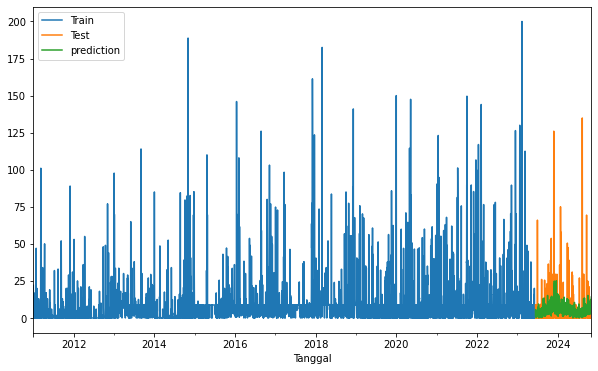

In [ ]:
train['Curah_Hujan'].plot(legend=True, label='Train', figsize=(10,6))
test['Curah_Hujan'].plot(legend=True, label='Test')

pred_asli.plot(legend=True, label='prediction')

In [ ]:
# Calculate errors
errors = abs(test['Curah_Hujan'] - pred_asli)
mae = np.mean(np.abs(errors))
mse = mean_squared_error(test['Curah_Hujan'], pred_asli)
rmse = np.sqrt(mse)
mape = np.mean(np.abs(errors / test['Curah_Hujan'])) * 100
MAPE = mean_absolute_percentage_error(test['Curah_Hujan'], pred_asli)

# Print results
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print("(MAPE):", MAPE)

MAE: 3.89
MSE: 35.03
RMSE: 5.92
MAPE: 162.89%
(MAPE): 1.628925483023964


In [ ]:
x = 2
p = np.sqrt(x)

In [ ]:
y = p**2
y

2.0000000000000004

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

# Uji Shapiro-Wilk
stat, p_value = stats.shapiro(residual)
print('Statistik Shapiro-Wilk:', stat)
print('P-value:', p_value)

# Interpretasi
alpha = 0.05
if p_value > alpha:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)")
else:
    print("Ada cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)")

Statistik Shapiro-Wilk: 0.9171596765518188
P-value: 6.968562418730936e-14
Ada cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)


In [ ]:
x = 2

In [ ]:
p = np.log (x + 500)
p

6.218600119691729

In [ ]:
y = np.exp(p) - 500
y

1.9999999999998295

In [ ]:
# Calculate errors
errors = abs(test['Curah_Hujan_Normalized'] - test_pred)
mae = np.mean(np.abs(errors))
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs(errors / test['Curah_Hujan_Normalized'])) * 100

# Print results
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

KeyError: 'Curah_Hujan_Normalized'

In [ ]:
final_model=ExponentialSmoothing(df.Scaled_Data,trend='add', seasonal='add', seasonal_periods=365).fit()

In [ ]:
pred=final_model.forecast(365)

In [ ]:
pred

2024-08-01    0.047315
2024-08-02   -0.411923
2024-08-03   -0.777368
2024-08-04   -0.818084
2024-08-05   -0.720217
                ...   
2025-07-27   -0.838153
2025-07-28   -0.118034
2025-07-29   -0.326559
2025-07-30   -0.416549
2025-07-31   -0.103021
Freq: D, Length: 365, dtype: float64

In [ ]:
# Mengembalikan hasil ke skala asli
forecast_original = scaler.inverse_transform(pred.values.reshape(-1, 1))

# Menampilkan hasil prediksi
print("\nHasil prediksi 10 langkah ke depan:")
print(forecast_original.flatten())


Hasil prediksi 10 langkah ke depan:
[ 3.26323820e+00 -1.16754051e-01 -2.80642605e+00 -3.10609514e+00
 -2.38579467e+00  1.21771525e+00 -1.41868146e+00  1.63151576e+00
  3.10518791e+00  3.32546694e+00  1.85821228e-01  1.36941299e+00
  1.29947800e+00 -2.60048413e+00 -1.22041196e+00 -2.00367206e+00
 -1.80358727e+00 -9.53497152e-01 -2.19333203e+00  2.82686549e+00
  5.36770365e-02 -9.79460445e-01 -1.92595895e+00  4.99760789e+00
 -1.22183274e-01 -6.85414410e-01 -1.86530068e+00  1.06154294e+00
  5.92501520e+00  7.35090723e-01  4.75182665e+00 -9.08171122e-01
  2.84851252e+00  1.53528297e+00 -1.31126212e+00 -1.72115577e+00
 -1.08403783e-03 -1.17753943e+00 -2.97326776e-01 -2.48723435e+00
  6.53056656e-01 -2.20344735e+00 -2.18660858e+00 -2.54639353e+00
 -1.14607833e+00 -9.72615615e-01 -2.97247814e+00  1.03758710e+00
  3.04095181e+00  1.49437292e+00  8.45028288e-02 -1.93202328e+00
  5.77815434e+00  2.36506314e+00  3.91816268e-01  5.91856849e+00
  1.12186683e+01  7.70543595e+00  9.49572081e+00  7.7

<AxesSubplot:xlabel='Tanggal'>

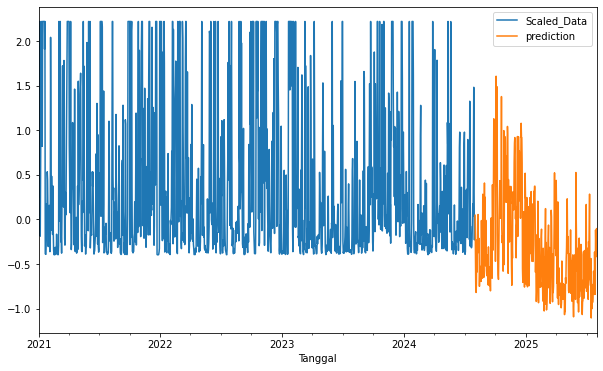

In [ ]:
df['Scaled_Data'].plot(legend=True, label='Scaled_Data', figsize=(10,6))
pred.plot(legend=True, label='prediction')

In [ ]:
test_kl.plot(legend=True, label='Test')
test_kl.plot(legend=True, label='predicted_test')

In [ ]:
model = HWES(train_kl, seasonal_periods = 365, trend = 'add', seasonal = "add")
fitted = model.fit()
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Kelembaban   No. Observations:                 1045
Model:             ExponentialSmoothing   SSE                           8028.560
Optimized:                         True   AIC                           2868.743
Trend:                         Additive   BIC                           4695.947
Seasonal:                      Additive   AICC                          3278.883
Seasonal Periods:                   365   Date:                 Tue, 13 Aug 2024
Box-Cox:                          False   Time:                         20:36:02
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.5524601                alpha                 True
smoothing_trend       

In [ ]:
model = HWES(train_kl, seasonal_periods = 365, trend = 'add', seasonal = "mul")
fitted = model.fit(optimized=True, use_brute=True)
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Kelembaban   No. Observations:                 1045
Model:             ExponentialSmoothing   SSE                          10212.190
Optimized:                         True   AIC                           3120.146
Trend:                         Additive   BIC                           4947.350
Seasonal:                Multiplicative   AICC                          3530.285
Seasonal Periods:                   365   Date:                 Tue, 13 Aug 2024
Box-Cox:                          False   Time:                         20:36:15
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.5296300                alpha                 True
smoothing_trend       

D:\anaconda2\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
forecast = fitted.forecast(steps=12)

InvalidIndexError: (slice(None, None, None), None)

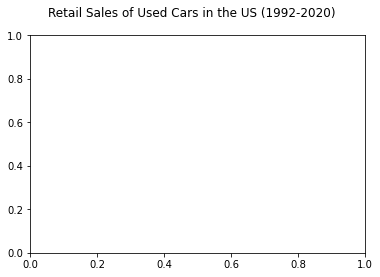

In [ ]:
fig = plt.figure()
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')
past, = plt.plot(train_kl.index, train_kl, 'b.-', label='Sales History')
future, = plt.plot(test_kl.index, test_kl, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(test_kl.index, forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

InvalidIndexError: (slice(None, None, None), None)

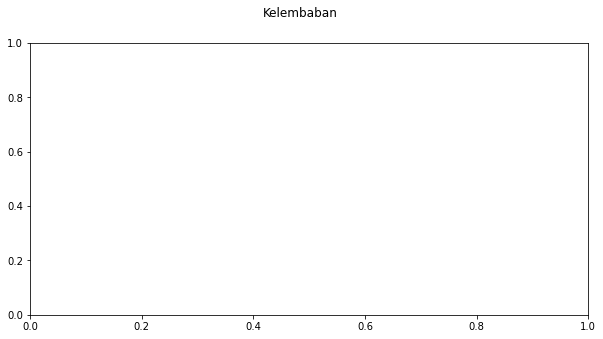

In [ ]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Kelembaban') 
past, = plt.plot(train_kl.index, train_kl, 'b.-', label='train')
future, = plt.plot(test_kl.index, test_kl, 'r.-', label='test')
predicted_future, = plt.plot(test_kl.index, forecast, 'g.-', label='Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

NameError: name 'prediction_kl' is not defined

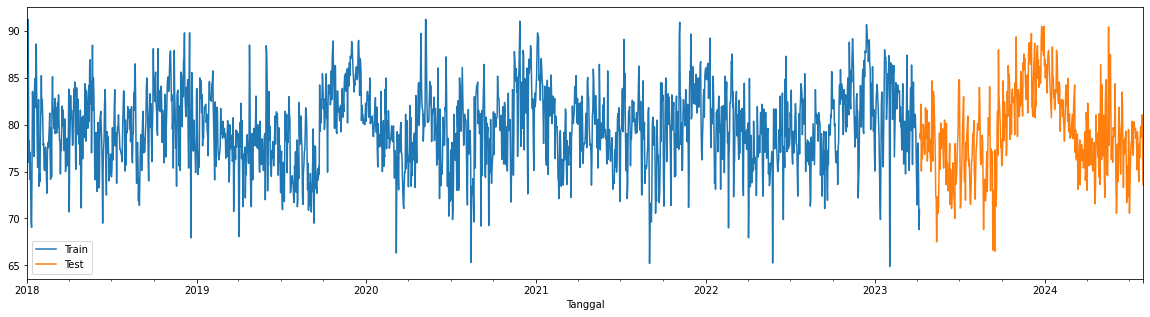

In [ ]:
train_kl['Kelembaban'].plot(legend=True, label='Train', figsize=(20,5))
test_kl['Kelembaban'].plot(legend=True, label="Test")
prediction_kl.plot(legend=True,label='Prediction')
plt.title("Model Result",size=30)
plt.show()

In [ ]:
df=df.groupby('Tanggal').sum()

In [ ]:
hwmodel_kl=ExponentialSmoothing(train.Kelembaban, trend='add', seasonal='mul', seasonal_periods=4).fit()

D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
test_pred=hwmodel_kl.forecast(300)

<AxesSubplot:xlabel='Tanggal'>

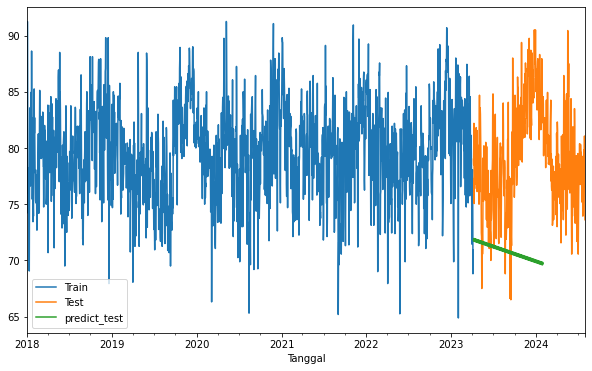

In [ ]:
train['Kelembaban'].plot(legend=True, label='Train', figsize=(10,6))
test['Kelembaban'].plot(legend=True, label='Test')
test_pred.plot(legend=True, label='predict_test')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test,test_pred))

In [ ]:
ch = df.drop(columns=['Kelembaban','Suhu'])

<AxesSubplot:xlabel='Tanggal'>

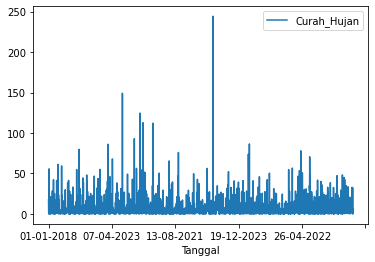

In [ ]:
ch.plot()

In [ ]:
# Tentukan proporsi pembagian
train_size = int(len(ch) * 0.8)

# Membagi data
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [ ]:
train.tail()

,Curah_Hujan,Kelembaban,Suhu
Tanggal,,,
25-04-2018,14.80,75.75,30.26
25-04-2019,11.53,88.50,27.99
25-04-2020,5.29,81.25,29.31
25-04-2021,0.14,80.06,29.19
25-04-2022,7.14,77.75,29.91


In [ ]:
hwmodel=ExponentialSmoothing(train.Curah_Hujan, trend='add', seasonal='add', seasonal_periods=4).fit()

D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '13-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '13-01-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '13-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '13-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557

In [ ]:
test_pred=hwmodel.forecast(5)

NameError: name 'hwmodel' is not defined

In [ ]:
decompose_result = seasonal_decompose(ch['Curah_Hujan'],model='multiplicative')

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [ ]:
ch = ch.set_index('Tanggal')

Text(0, 0.5, 'Curah Hujan')

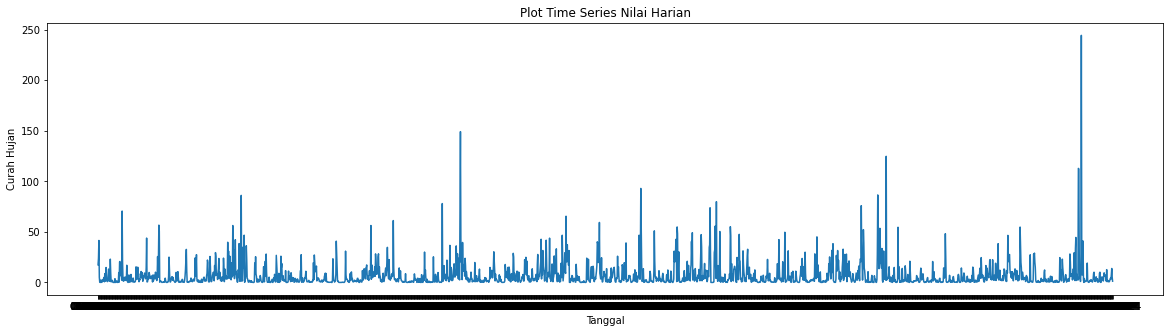

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(ch.index,ch['Curah Hujan'])

# Menambahkan judul dan label
plt.title('Plot Time Series Nilai Harian')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan')

In [ ]:
ch.sort_index(inplace = TRUE)

NameError: name 'TRUE' is not defined

In [ ]:
from forecast import plot_components_x13
plot_components_x13(ch)
plt.show()

ModuleNotFoundError: No module named 'forecast'

In [ ]:
decompose_result = seasonal_decompose(ch['Curah Hujan'], model = 'aditive')
decompose_result.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

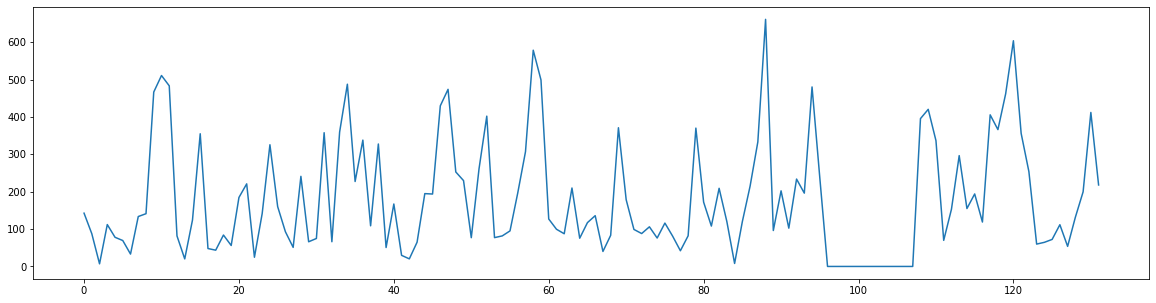

In [ ]:
ch = ch['Curah Hujan'].plot(figsize=(20,5))
plt.show()

In [ ]:
df_decompose = seasonal_decompose(df['SST'],model = "additive")
fig = df_decompose.plot()
fig.set_size_inches(16,9)
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

In [ ]:
size = int(len(df)*0.8)
train_df = df[:size]
test_df = df[size:]

In [ ]:
train_df.tail()

,SST
Tahun,
2010-08-01,880.24
2010-09-01,860.53
2010-10-01,896.96
2010-11-01,882.95
2010-12-01,919.93


NameError: name 'predictions_df' is not defined

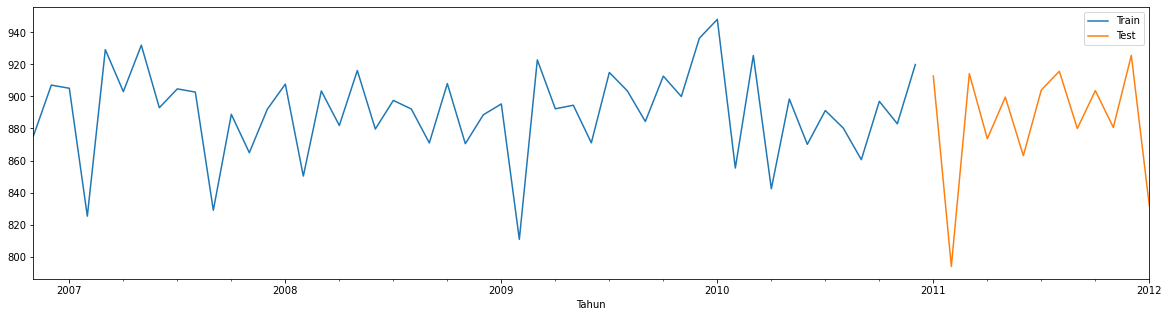

In [ ]:
train_df['SST'].plot(legend=True, label="Train", figsize=(20,5))
test_df['SST'].plot(legend=True, label="Test")
predictions_df.plot(legend=True, label="Prediction")
plt.title("Model Result", size=20)
plt.show()

In [ ]:
fitted_model = ExponentialSmoothing(train_df['SST'], trend='add', seasonal='add', seasonal_periods=12)
predictions_df = fitted_model.forecast(60)

AttributeError: 'ExponentialSmoothing' object has no attribute 'forecast'